In [1]:
import os 
import copy 
import numpy as np 
import pandas as pd 
from dekef.kernel_function import *
from dekef.base_density import *
import matplotlib.pyplot as plt 

from IFlogdensity.contam_sm_de import *

seed_no = 0
np.random.seed(seed_no)

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (1., 310.)
plot_pts_cnt = 3000
new_data = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

contam_weight = 1e-3

kernel_type = 'gaussian_poly2'
bw = 5.0

var_name = 'additional observation'
method = 'SM'

base_density = BasedenGamma(data_waiting)

### Uncontaminated Density 

In [3]:
contam_pt = 20.
log_pen_param = -15.
uncontam_sm = ContamSMDensityEstimate(
    data = data_waiting, 
    contam_data = np.array([contam_pt]).reshape(-1, 1), 
    contam_weight = 0., 
    penalty_param = np.exp(log_pen_param), 
    base_density = base_density,
    r1 = 1.0, 
    r2 = 0.0, 
    c = 0., 
    bw = bw, 
    kernel_type = 'gaussian_poly2')

In [4]:
uncontam_coef = uncontam_sm.coef()

In [5]:
Kmat = uncontam_sm.matrix_K()
uncontam_norm = np.sqrt(uncontam_coef.T @ Kmat @ uncontam_coef).item()

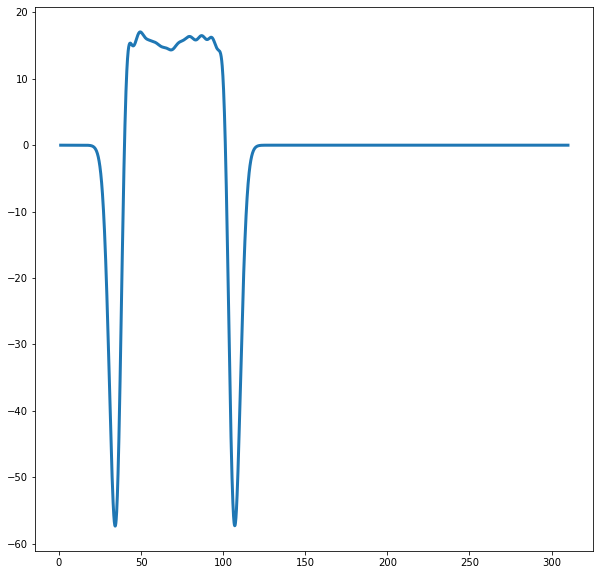

In [6]:
natparam = uncontam_sm.natural_param(new_data, uncontam_coef)

plt.figure(figsize = (10, 10))
plt.plot(new_data, natparam, color = 'tab:blue', lw = 3.0)
# plt.axvline(x = 20., color = 'k', linestyle='--')
plt.show()

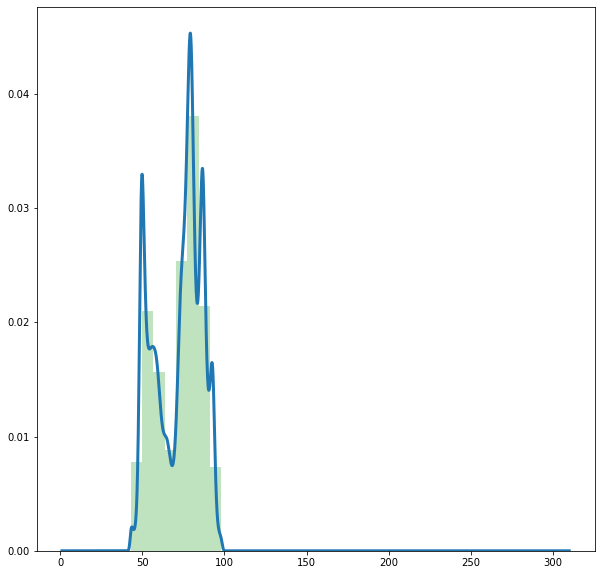

In [7]:
uncontam_logden_vals = uncontam_sm.log_density(new_data, True)

plt.figure(figsize = (10, 10))
plt.plot(new_data, np.exp(uncontam_logden_vals), color = 'tab:blue', lw = 3.0)
plt.hist(data_waiting, bins='fd', density = True, alpha = 0.3, color = 'tab:green')
# plt.axvline(x = 20., color = 'k', linestyle='--')
plt.show()

In [8]:
full_save_folder = (f'data/PenSM-ContamData={contam_pt}-bw={bw}-kernel={kernel_type}-' + 
                    f'contamweight={contam_weight}-plotdomain={xlimit}-plotcnts={plot_pts_cnt}-' + 
                    f'seed={0}')
if not os.path.isdir(full_save_folder):
    os.mkdir(full_save_folder)

In [9]:
file_name_newdata = f'/new_data.npy'
np.save(full_save_folder + file_name_newdata, new_data)

file_name_coef = f'/logpenparam={log_pen_param}-uncontam-coef.npy'
np.save(full_save_folder + file_name_coef, uncontam_coef)

file_name_diff = f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy'
np.save(full_save_folder + file_name_diff, uncontam_logden_vals)

### Contaminated Density 

In [10]:
contam_sm = ContamSMDensityEstimate(
    data = data_waiting, 
    contam_data = np.array([contam_pt]).reshape(-1, 1), 
    contam_weight = contam_weight, 
    penalty_param = np.exp(log_pen_param), 
    base_density = base_density,
    r1 = 1.0, 
    r2 = 0.0, 
    c = 0., 
    bw = bw, 
    kernel_type = 'gaussian_poly2')

In [11]:
contam_coef = contam_sm.coef()

In [12]:
Kmat = contam_sm.matrix_K()
contam_norm = np.sqrt(contam_coef.T @ Kmat @ contam_coef).item()

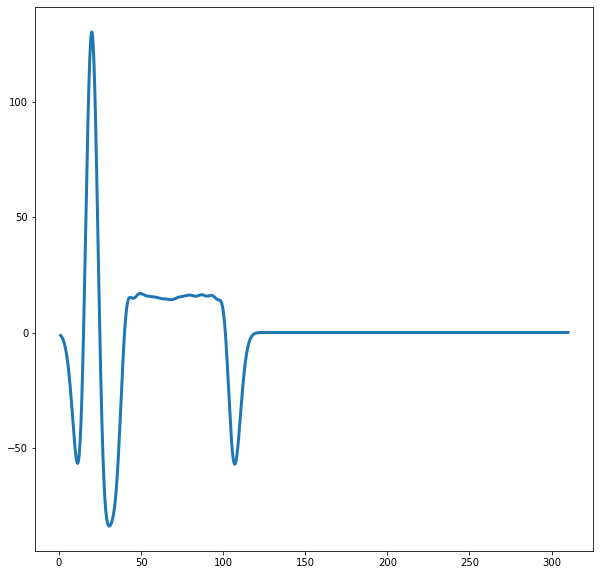

In [13]:
natparam = contam_sm.natural_param(new_data, contam_coef)

plt.figure(figsize = (10, 10))
plt.plot(new_data, natparam, color = 'tab:blue', lw = 3.0)
# plt.axvline(x = 20., color = 'k', linestyle='--')
plt.show()

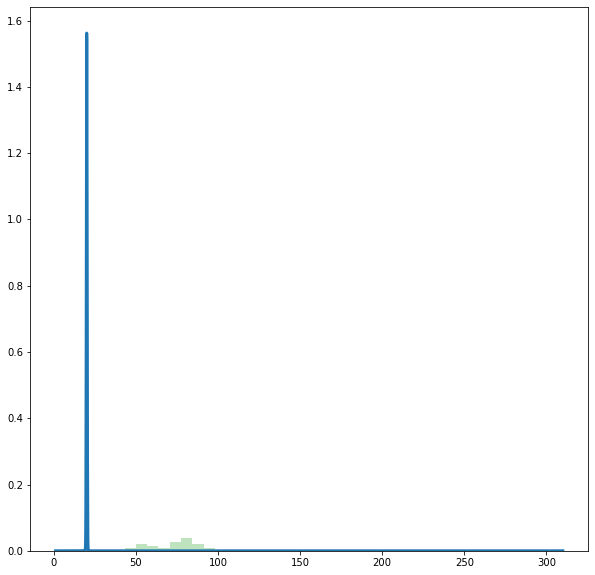

In [14]:
contam_logden_vals = contam_sm.log_density(new_data, True)

plt.figure(figsize = (10, 10))
plt.plot(new_data, np.exp(contam_logden_vals), color = 'tab:blue', lw = 3.0)
plt.hist(data_waiting, bins='fd', density = True, alpha = 0.3, color = 'tab:green')
# plt.axvline(x = 20., color = 'k', linestyle='--')
plt.show()

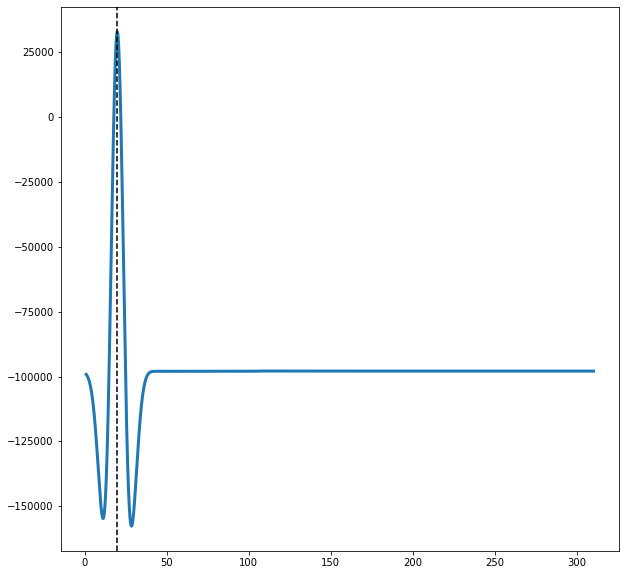

In [15]:
IF_vals = (contam_logden_vals - uncontam_logden_vals) / contam_weight

plt.figure(figsize = (10, 10))
plt.plot(new_data, IF_vals, color = 'tab:blue', lw = 3.0)
plt.axvline(x = contam_pt, color = 'k', linestyle='--')
plt.show()

In [16]:
# # save coefficients 
# file_name_coef = f'/logpenparam={log_pen_param}-contam-coef.npy'
# np.save(full_save_folder + file_name_coef, contam_coef)

# file_name_diff = f'/logpenparam={log_pen_param}-contam-logden-newdata.npy'
# np.save(full_save_folder + file_name_diff, contam_logden_vals)

# file_name_ifvals = f'/logpenparam={log_pen_param}-IF-newdata.npy'
# np.save(full_save_folder + file_name_ifvals, IF_vals)

In [17]:
print(uncontam_norm, contam_norm, np.max(np.abs(IF_vals)))

195.7366351521126 299.8536407657675 157673.67385138245


In [229]:
text = """
log penalty = -15.0
195.66439727119416 299.57320215848813 130756.15411687215
**************************************************
log penalty = -14.5
133.0628232761629 191.6102875441511 79314.27150149299
**************************************************
log penalty = -14.0
90.38047829296738 122.88125363080289 39429.42344911797
**************************************************
log penalty = -13.5
61.8406760933569 79.83377806450787 27660.31977622093
**************************************************
log penalty = -13.0
43.13408990819326 52.87041310822399 17708.20567867814
**************************************************
log penalty = -12.5
31.16436973739025 36.284628571908854 10751.95070520021
**************************************************
log penalty = -12.0
23.482944708828818 26.064210300665096 6535.961977719569
**************************************************
log penalty = -11.5
18.2982767816186 19.54758898593647 3983.865130369711
**************************************************
log penalty = -11.0
14.522106128815592 15.118088433326347 2439.7425933587547
**************************************************
log penalty = -10.5
11.600698860042595 11.884463917370129 1504.191214941983
**************************************************
log penalty = -10.0
9.314679845061212 9.400672708229086 933.7319809576953
**************************************************
log penalty = -9.5
7.381889272864671 7.446911799138343 581.8900644260161
**************************************************
log penalty = -9.0
5.879595402884148 5.910254513058604 362.3976997709199
**************************************************
log penalty = -8.5
4.694426985930769 4.708381470059128 224.82906432444238
**************************************************
log penalty = -8.0
3.758398378765365 3.7643595579200304 138.72540450884685
**************************************************
log penalty = -7.5
3.012464613213359 3.0147130015379835 85.18063262995668
**************************************************
log penalty = -7.0
2.411857952632201 2.4124474367119793 52.10410240130514
**************************************************
log penalty = -6.5
1.9192773814903767 1.919157487434265 31.788226292420063
**************************************************
log penalty = -6.0
1.5030868464300056 1.5026837217270064 19.35490726479472
**************************************************
log penalty = -5.5
1.1439903889628253 1.1435032203033209 11.764971653089873
**************************************************
log penalty = -5.0
0.8379603711418389 0.8374936624430824 7.139810359653609
**************************************************
log penalty = -4.5
0.5887997332776431 0.5884074551281137 4.326685988939261
**************************************************
log penalty = -4.0
0.3979837501301436 0.39768378225425616 2.619492087987396
**************************************************
log penalty = -3.5
0.2604267136573992 0.2602131377471419 1.585447311395427
**************************************************
log penalty = -3.0
0.16622774056957454 0.16608349060220118 0.9597801688094876
**************************************************
log penalty = -2.5
0.10422691829942252 0.1041330718809447 0.5812627564125705
**************************************************
log penalty = -2.0
0.06456476282822664 0.06450524282763218 0.3521767386871488
**************************************************
log penalty = -1.5
0.03968012483201405 0.03964300056069721 0.2134527888699722
**************************************************
log penalty = -1.0
0.024264043817883912 0.024241133797710458 0.12940572078434798
**************************************************
log penalty = -0.5
0.014790618950562554 0.014776574849534941 0.078465636555336
**************************************************
log penalty = 0.0
0.008998391510885472 0.008989817814494575 0.04758319261100041
**************************************************
log penalty = 0.5
0.005467959126072464 0.005462738287186856 0.02885744845926297
**************************************************
log penalty = 1.0
0.003320237552533035 0.0033170633182664144 0.017501733694302857
"""

In [230]:
new_t = text.split('*' * 50)
new_t
ntt = [item.split('\n')[2] for item in new_t]

In [231]:
ntt

['195.66439727119416 299.57320215848813 130756.15411687215',
 '133.0628232761629 191.6102875441511 79314.27150149299',
 '90.38047829296738 122.88125363080289 39429.42344911797',
 '61.8406760933569 79.83377806450787 27660.31977622093',
 '43.13408990819326 52.87041310822399 17708.20567867814',
 '31.16436973739025 36.284628571908854 10751.95070520021',
 '23.482944708828818 26.064210300665096 6535.961977719569',
 '18.2982767816186 19.54758898593647 3983.865130369711',
 '14.522106128815592 15.118088433326347 2439.7425933587547',
 '11.600698860042595 11.884463917370129 1504.191214941983',
 '9.314679845061212 9.400672708229086 933.7319809576953',
 '7.381889272864671 7.446911799138343 581.8900644260161',
 '5.879595402884148 5.910254513058604 362.3976997709199',
 '4.694426985930769 4.708381470059128 224.82906432444238',
 '3.758398378765365 3.7643595579200304 138.72540450884685',
 '3.012464613213359 3.0147130015379835 85.18063262995668',
 '2.411857952632201 2.4124474367119793 52.10410240130514',

In [234]:
ntt2 = [item.split() for item in ntt]
result = [[float(item) for item in item1] for item1 in ntt2]
result

[[195.66439727119416, 299.57320215848813, 130756.15411687215],
 [133.0628232761629, 191.6102875441511, 79314.27150149299],
 [90.38047829296738, 122.88125363080289, 39429.42344911797],
 [61.8406760933569, 79.83377806450787, 27660.31977622093],
 [43.13408990819326, 52.87041310822399, 17708.20567867814],
 [31.16436973739025, 36.284628571908854, 10751.95070520021],
 [23.482944708828818, 26.064210300665096, 6535.961977719569],
 [18.2982767816186, 19.54758898593647, 3983.865130369711],
 [14.522106128815592, 15.118088433326347, 2439.7425933587547],
 [11.600698860042595, 11.884463917370129, 1504.191214941983],
 [9.314679845061212, 9.400672708229086, 933.7319809576953],
 [7.381889272864671, 7.446911799138343, 581.8900644260161],
 [5.879595402884148, 5.910254513058604, 362.3976997709199],
 [4.694426985930769, 4.708381470059128, 224.82906432444238],
 [3.758398378765365, 3.7643595579200304, 138.72540450884685],
 [3.012464613213359, 3.0147130015379835, 85.18063262995668],
 [2.411857952632201, 2.412

In [235]:
pd.DataFrame(result).to_csv('data111.csv')